In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
col_dict = {
    'bert_base_cls':"BERT",
    'roberta_base_combined':'MultiRoBERTaBase',
    'bart_base_qa':'BARTBase',
    'bart_squad_qa':'BARTSQuaD',
    'roberta_squad_combined':'MultiRoBERTaSQuaD',
    'roberta_base_qa':'RoBERTaBase',
    'roberta_squad_qa':'RoBERTaSQuaD',
}

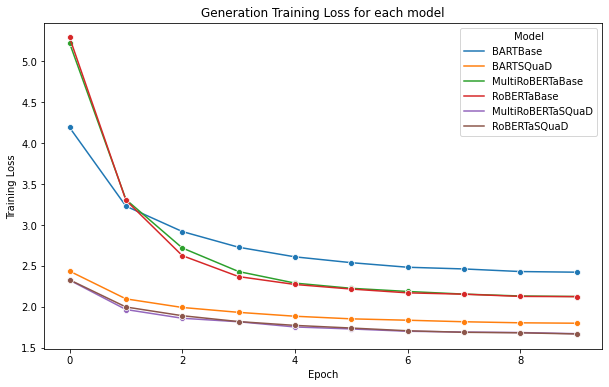

In [40]:
x = pd.read_excel(r'G:\My Drive\Waterloo\_MSCI_641\project\all_results\all_results.xlsx',
                  sheet_name='Train_Loss_QA')

x.columns = x.iloc[0]

x = x.iloc[1:-1,:-1]


x['Epoch'] = x['Row Labels']
del x['Row Labels']
del x['bert_base_cls']

x.rename(col_dict, inplace=True, axis=1)

df_melted = x.melt(id_vars=['Epoch'], var_name='Model', value_name='Loss')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Epoch', y='Loss', hue='Model', marker='o')

#for model in df_melted['Model'].unique():
#    final_epoch = df_melted[df_melted['Model'] == model].iloc[-1]
#    plt.text(final_epoch['Epoch'], final_epoch['Loss'], f"{final_epoch['Loss']:.2f}", 
#             horizontalalignment='right', size='medium', color='black')#, weight='semibold')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Generation Training Loss for each model')
plt.grid(False)

plt.show()

In [41]:

x.rename(col_dict, axis=1)

,BARTBase,BARTSQuaD,MultiRoBERTaBase,RoBERTaBase,MultiRoBERTaSQuaD,RoBERTaSQuaD,Epoch
1,4.191468,2.435444,5.223506,5.291683,2.325423,2.329019,0
2,3.229725,2.096331,3.310742,3.301318,1.96605,1.996926,1
3,2.9194,1.991211,2.718655,2.624871,1.859469,1.890458,2
4,2.727321,1.931561,2.430198,2.368534,1.816447,1.818554,3
5,2.609933,1.884027,2.288951,2.272221,1.75283,1.772093,4
6,2.538663,1.852166,2.225413,2.216229,1.728405,1.739736,5
7,2.482812,1.835239,2.186817,2.169855,1.700304,1.706351,6
8,2.462051,1.816534,2.154433,2.153469,1.690524,1.687738,7
9,2.430206,1.803702,2.131506,2.126396,1.6848,1.681472,8
10,2.422432,1.798619,2.125274,2.123706,1.670804,1.667227,9


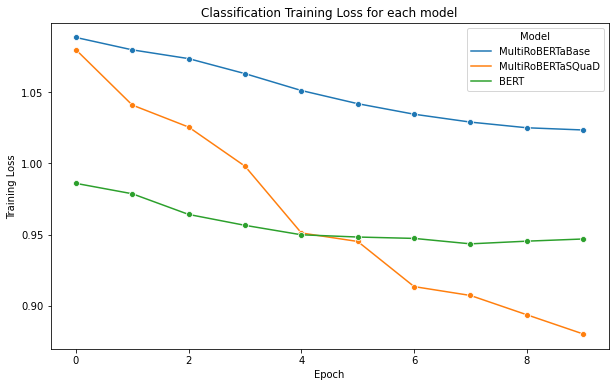

In [42]:
x = pd.read_excel(r'G:\My Drive\Waterloo\_MSCI_641\project\all_results\all_results.xlsx',
                  sheet_name='Train_Loss_CLS')

x.columns = x.iloc[0]

x = x.iloc[1:-1,:-1]


x['Epoch'] = x['Row Labels']
del x['Row Labels']
x.rename(col_dict, inplace=True, axis=1)

df_melted = x.melt(id_vars=['Epoch'], var_name='Model', value_name='Loss')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Epoch', y='Loss', hue='Model', marker='o')

#for model in df_melted['Model'].unique():
#    final_epoch = df_melted[df_melted['Model'] == model].iloc[-1]
#    plt.text(final_epoch['Epoch'], final_epoch['Loss'], f"{final_epoch['Loss']:.2f}", 
#             horizontalalignment='right', size='medium', color='black')#, weight='semibold')

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Classification Training Loss for each model')
plt.grid(False)

plt.show()

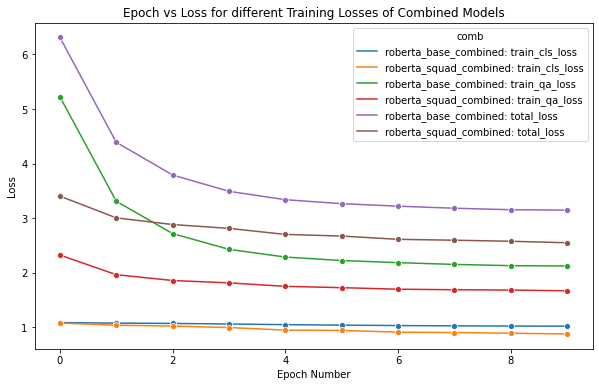

In [43]:
x = pd.read_excel(r'G:\My Drive\Waterloo\_MSCI_641\project\all_results\all_results.xlsx',
                  sheet_name='combined')

x = x[['name','epoch','train_cls_loss','train_qa_loss']]
x['total_loss'] = x['train_cls_loss'] + x['train_qa_loss']

x = x[x['name'].apply(lambda x: 'combined' in x)]
x.rename(col_dict, inplace=True, axis=1)

df_melted = x.melt(id_vars=['epoch','name'], var_name='Model', value_name='Loss')


df_melted = pd.melt(x, id_vars=['name', 'epoch'], 
                    value_vars=['train_cls_loss', 'train_qa_loss','total_loss'], 
                    var_name='loss type', value_name='loss')

#df_melted = df_melted[df_melted['epoch']> 1]
df_melted['comb'] = df_melted['name'] + ': ' + df_melted['loss type'] 

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='epoch', y='loss', hue='comb',marker='o', dashes=False)

plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Epoch vs Loss for different Training Losses of Combined Models')
plt.grid(False)

plt.show()

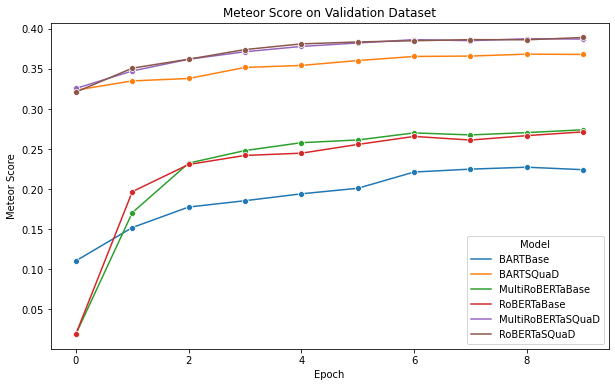

In [44]:
x = pd.read_excel(r'G:\My Drive\Waterloo\_MSCI_641\project\all_results\all_results.xlsx',
                  sheet_name='Validation_Meteor')

x.columns = x.iloc[0]

x = x.iloc[1:-1,:-1]


x['Epoch'] = x['Row Labels']
del x['Row Labels']
del x['bert_base_cls']
x.rename(col_dict, inplace=True, axis=1)

df_melted = x.melt(id_vars=['Epoch'], var_name='Model', value_name='M')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Epoch', y='M', hue='Model', marker='o')

#for model in df_melted['Model'].unique():
#    final_epoch = df_melted[df_melted['Model'] == model].iloc[-1]
#    plt.text(final_epoch['Epoch'], final_epoch['Loss'], f"{final_epoch['Loss']:.2f}", 
#             horizontalalignment='right', size='medium', color='black')#, weight='semibold')

plt.xlabel('Epoch')
plt.ylabel('Meteor Score')
plt.title('Meteor Score on Validation Dataset')
plt.grid(False)

plt.show()

In [45]:
x

,BARTBase,BARTSQuaD,MultiRoBERTaBase,RoBERTaBase,MultiRoBERTaSQuaD,RoBERTaSQuaD,Epoch
1,0.1105,0.3235,0.0192,0.0193,0.3256,0.3211,0
2,0.152,0.335,0.1706,0.1968,0.3474,0.3509,1
3,0.1776,0.338,0.2324,0.2307,0.362,0.3621,2
4,0.1855,0.3518,0.2481,0.242,0.3714,0.3741,3
5,0.1941,0.3543,0.2579,0.2448,0.378,0.3812,4
6,0.201,0.3604,0.2613,0.2557,0.3823,0.3836,5
7,0.2213,0.3655,0.2701,0.2657,0.3865,0.3851,6
8,0.2249,0.366,0.2676,0.2612,0.3852,0.3865,7
9,0.2273,0.3684,0.2705,0.2667,0.3876,0.3863,8
10,0.2242,0.368,0.274,0.2714,0.3872,0.3892,9


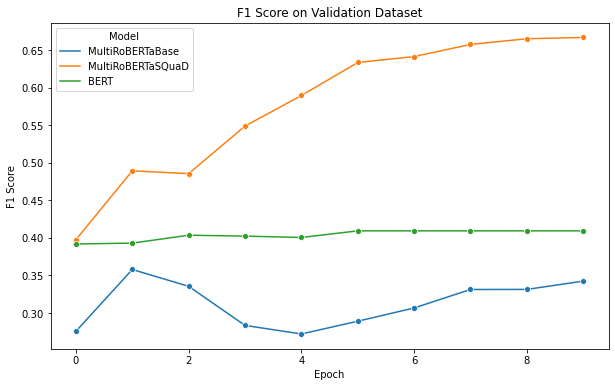

In [46]:
x = pd.read_excel(r'G:\My Drive\Waterloo\_MSCI_641\project\all_results\all_results.xlsx',
                  sheet_name='Validation_F1')

x.columns = x.iloc[0]

x = x.iloc[1:-1,:-1]


x['Epoch'] = x['Row Labels']
del x['Row Labels']
x.rename(col_dict, inplace=True, axis=1)

df_melted = x.melt(id_vars=['Epoch'], var_name='Model', value_name='F1')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Epoch', y='F1', hue='Model', marker='o')

#for model in df_melted['Model'].unique():
#    final_epoch = df_melted[df_melted['Model'] == model].iloc[-1]
#    plt.text(final_epoch['Epoch'], final_epoch['Loss'], f"{final_epoch['Loss']:.2f}", 
#             horizontalalignment='right', size='medium', color='black')#, weight='semibold')

plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('F1 Score on Validation Dataset')
plt.grid(False)

plt.show()

In [47]:
x.columns = x.iloc[0]

x = x.iloc[1:-1,:-1]
x

1,0.2757,0.3976,0.3918
2,0.3579,0.4892,0.393
3,0.3355,0.4854,0.4035
4,0.2835,0.5487,0.4023
5,0.2721,0.5894,0.4005
6,0.2891,0.6333,0.4093
7,0.3067,0.6412,0.4093
8,0.3313,0.6573,0.4093
9,0.3314,0.6649,0.4093
